In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import plotly.express as px 
import warnings 


warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
df = pd.read_csv("Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# EXPLORING DATA

In [6]:
# Define categorical an numeric columns 

num_features = [features for features in df.columns if df[features].dtype != "O"]
cat_features = [features for features in df.columns if df[features].dtype == "O"]

print("There are {} numerical features :{}".format(len(num_features), num_features))
print("There are {} categorical features :{}".format(len(cat_features), cat_features))

There are 3 numerical features :['no_of_employees', 'yr_of_estab', 'prevailing_wage']
There are 9 categorical features :['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
#Proportion of count data on categorical columns 
for col in cat_features:
    print(df[col].value_counts(normalize=True)*100)
    print("------------------------------------------------")

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV12       0.003925
EZYV13       0.003925
EZYV14       0.003925
EZYV15       0.003925
EZYV16       0.003925
Name: proportion, Length: 25480, dtype: float64
------------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
------------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
------------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
------------------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: propor

case_id:  benzersiz değerlere sahip fakat set üzerinde bir etkisi bulunmamaktadır.
continent:  

# Univariate Analysis 

    The term univariate anlysis refers to the analysis of one variable.

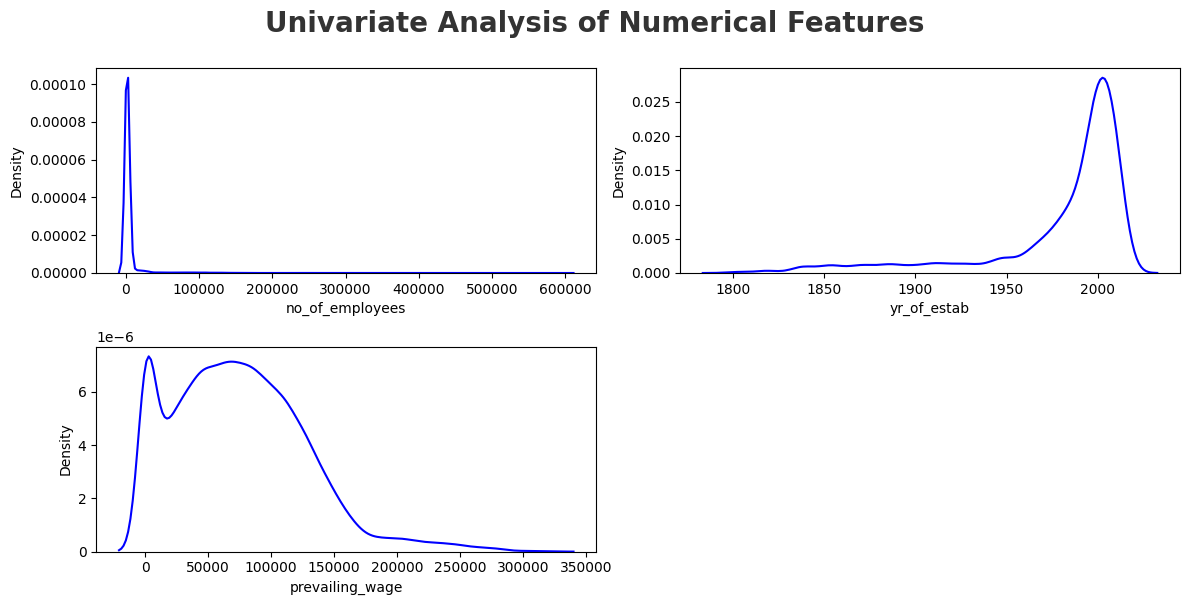

In [8]:
plt.figure(figsize=(12,6))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0,len(num_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[num_features[i]],color="blue")
    plt.xlabel(num_features[i])
    plt.tight_layout()

# Categorical Features

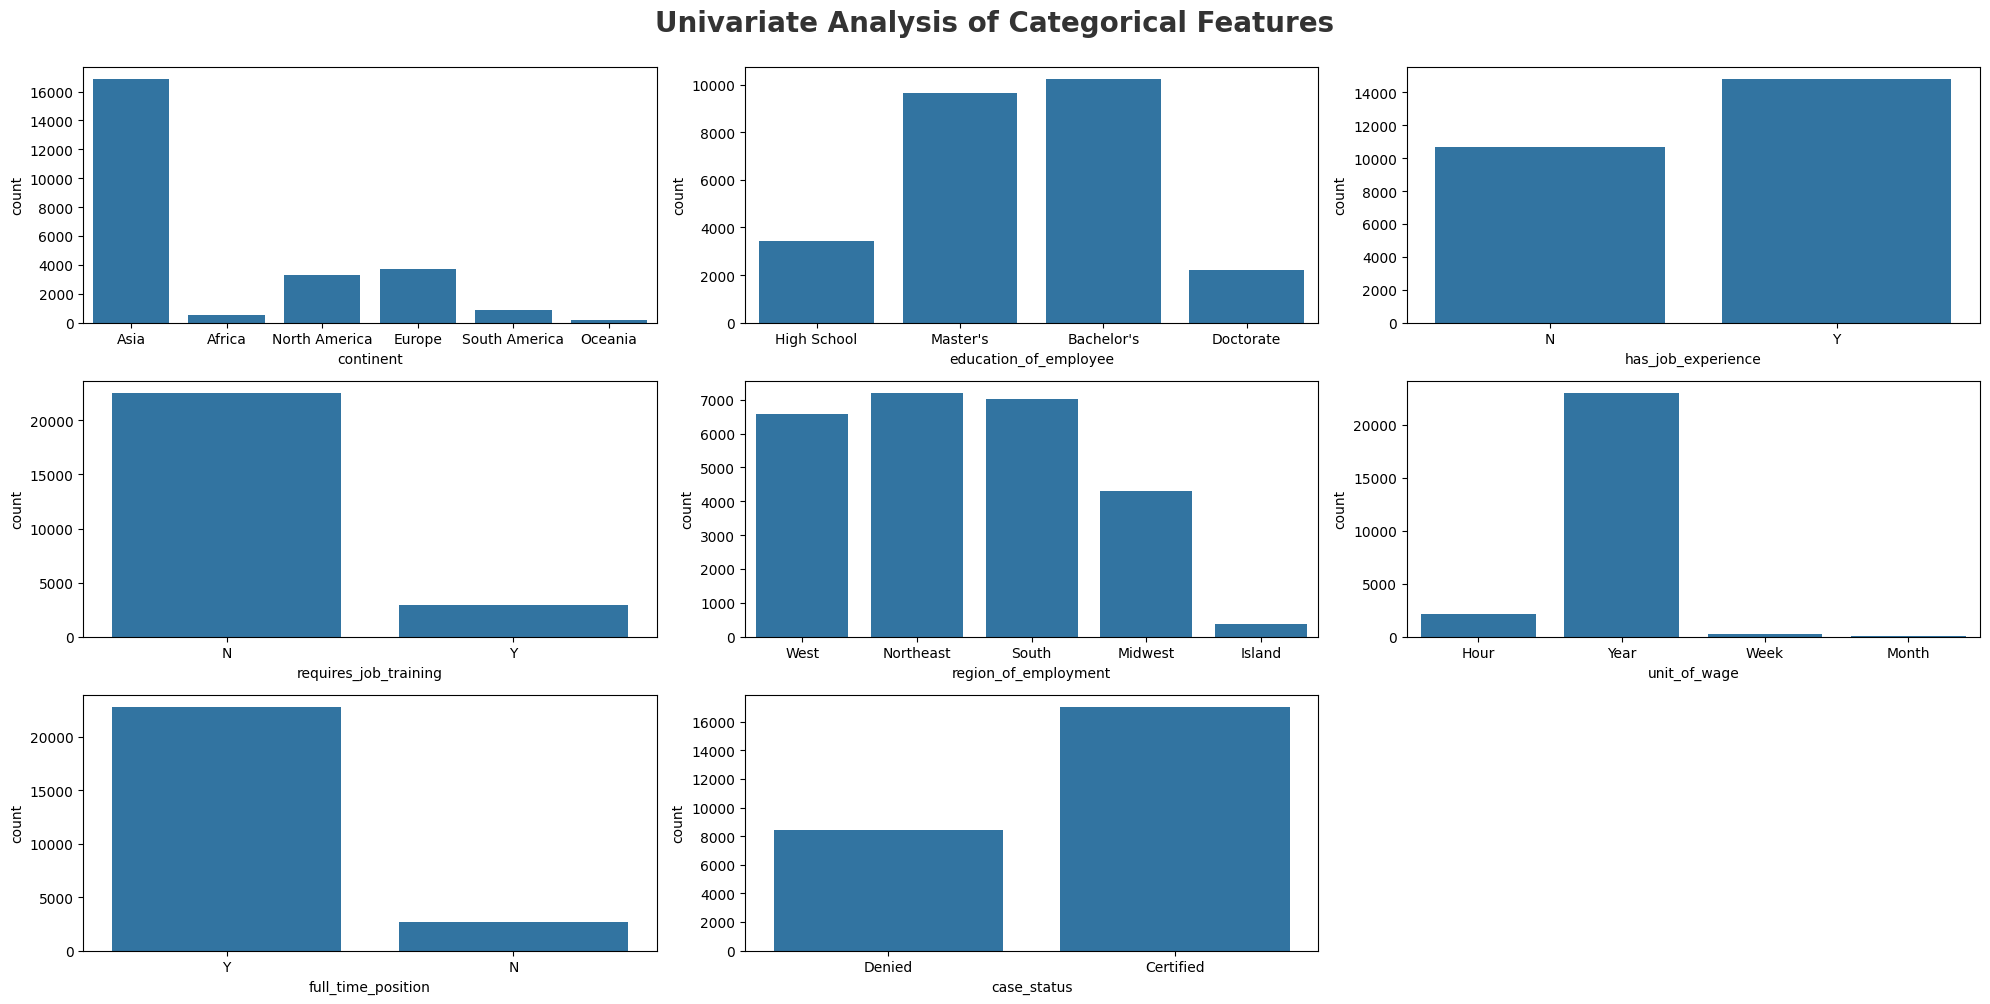

In [9]:
cat_features.remove("case_id")

plt.figure(figsize=(20,10))
plt.suptitle("Univariate Analysis of Categorical Features",fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(cat_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x= df[cat_features[i]])
    plt.xlabel(cat_features[i])
    plt.tight_layout()

# Multivariate Analysis 
Analysis of more than one variable.

In [10]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in num_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [11]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
# Korelasyon Matrisi Kullanarak Çoklu doğrusal bir ilişki olup olmadığını kontrol edeceğiz. 

corr_matrix = df[num_features].corr()
print(corr_matrix)

                 no_of_employees  yr_of_estab  prevailing_wage
no_of_employees         1.000000    -0.017770        -0.009523
yr_of_estab            -0.017770     1.000000         0.012342
prevailing_wage        -0.009523     0.012342         1.000000


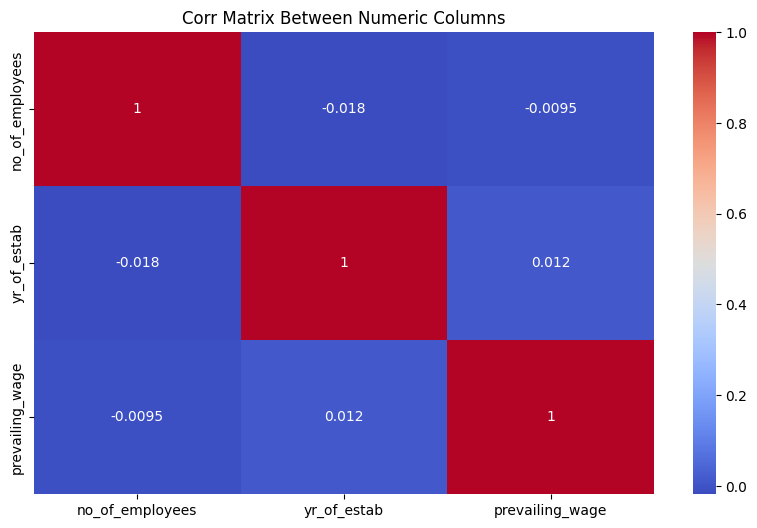

In [13]:
# Daha kaliteli bir görüntü oluşturmak için heatmap oluşturacağız . 

plt.figure(figsize=(10,6))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Corr Matrix Between Numeric Columns")
plt.show()

Sayısal sütunlar arasında herhangi bir çoklu doğrusal bağımlılık (Multicollineraity) bulunmamaktadır. 

# Check Multicollineraity for Categorical Features 
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status

In [14]:
from scipy.stats import chi2_contingency
chi2_test = []

for features in cat_features:
    if chi2_contingency(pd.crosstab(df["case_status"],df[features]))[1]<0.05: # fonksiyon sonucunda oluşan tupleda ikinci elaman p değeri olduğu için [1] diyoruz.
        chi2_test.append("Reject Null Hypothesis") # Değişkenler arasında anlamlı bir ilişki vardır.

    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data = [cat_features, chi2_test]).T # .T dataframe in transpozunu alır yani her satırda bir özellik ve onun hipotez sonucu yer alır.
result.columns = ["Column","Hypothesis Result"]
result



,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


# Checking Null Values

In [15]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [16]:
num_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [20]:
df["no_of_employees"].nunique()# Benzersiz değerlerin sayısını veririr
df["no_of_employees"].unique() # Benzersiz değerleri numpy dizisi olarak döndürür.

array([14513,  2412, 44444, ..., 24335, 48785, 40224], shape=(7105,))

In [23]:
continuous_features = [features for features in num_features if len(df[features])>10]
print("There are {} continous feature : {}".format(len(continuous_features),continuous_features))

There are 3 continous feature : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


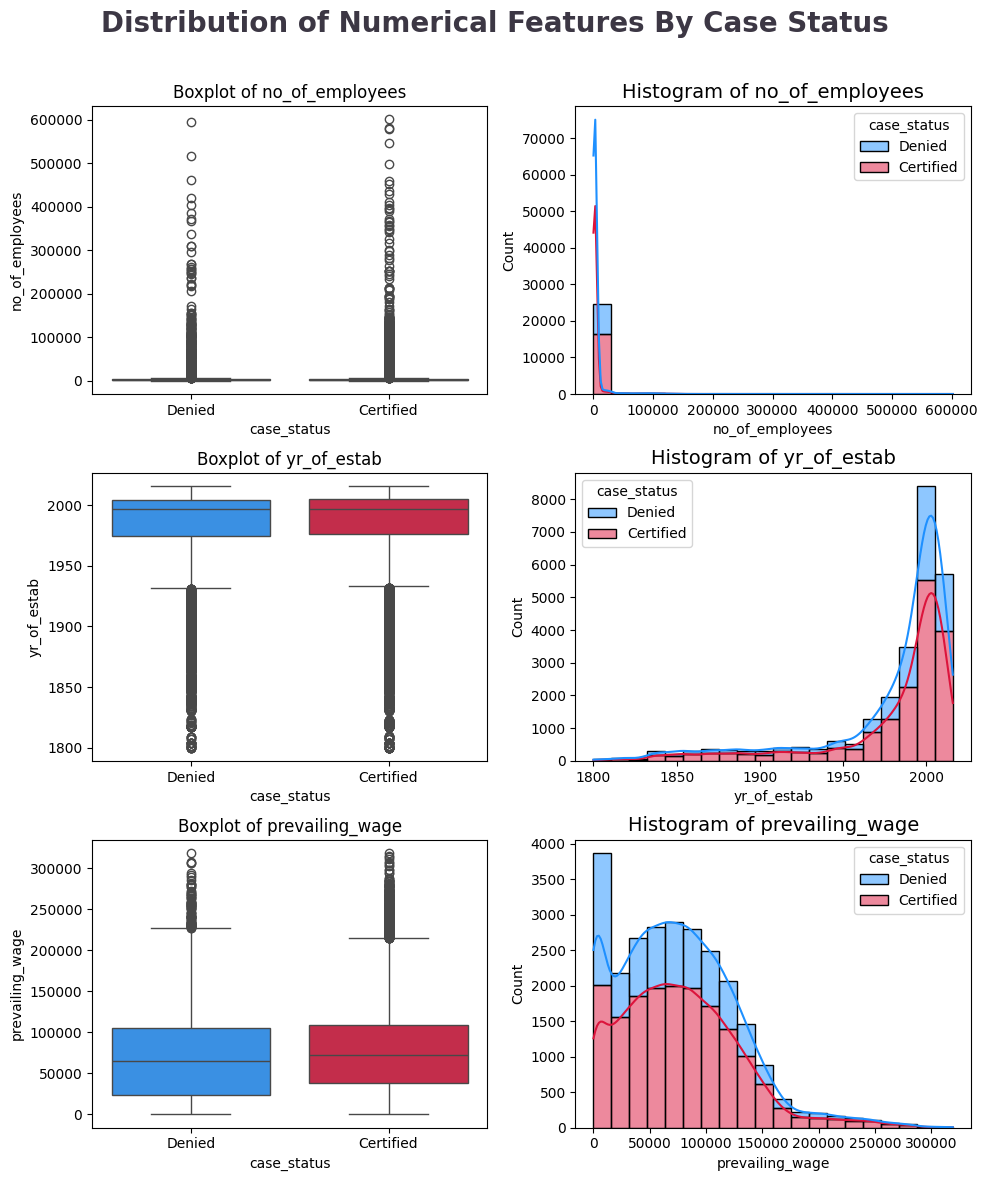

In [29]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continuous_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')